Let's install and import some required libraries before we begin.

In [ ]:
!pip install pandas numpy matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     |████████████████████████████████| 68 kB 2.9 MB/s 


In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
raw_df = pd.read_csv('diabetes_data_upload.csv')

In [ ]:
raw_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no



Let's drop any rows where the value of the target column `RainTomorrow` in empty.

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

In [ ]:
train_df,val_df,test_df=np.split(raw_df.sample(frac=1, random_state=42), [int(.6*len(raw_df)), int(.8*len(raw_df))])


In [ ]:
len(train_df)

312

In [ ]:
len(val_df)

104

In [ ]:
len(test_df)

104

### Input and Target Columns

Let's identify the input and target columns.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'class'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()


Let's also identify the numeric and categorical columns.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

[]


In [ ]:
print(categorical_cols)

['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']


### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\sm502\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
test_inputs

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,Polyphagia_Yes,Genital thrush_No,Genital thrush_Yes,visual blurring_No,visual blurring_Yes,Itching_No,Itching_Yes,Irritability_No,Irritability_Yes,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
207,Male,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
212,Male,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
295,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
476,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
251,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
511,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
477,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
303,Female,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
350,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
269,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_test

,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,Polyphagia_Yes,Genital thrush_No,Genital thrush_Yes,visual blurring_No,visual blurring_Yes,Itching_No,Itching_Yes,Irritability_No,Irritability_Yes,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
207,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
212,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
295,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
476,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
251,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
511,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
477,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
303,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
350,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
269,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


Let's save our work before continuing.

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(X_train, train_targets)

Wall time: 9.03 ms


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

In [ ]:
pd.value_counts(train_preds)

Positive    194
Negative    118
dtype: int64

The decision tree also returns probabilities for each prediction.

In [ ]:
train_probs = model.predict_proba(X_train)

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [ ]:
accuracy_score(train_targets, train_preds)

0.9935897435897436

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [ ]:
model.score(X_val, val_targets)

0.9230769230769231

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No". 

In [ ]:
val_targets.value_counts() / len(val_targets)

Positive    0.615385
Negative    0.384615
Name: class, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [ ]:
from sklearn.tree import plot_tree, export_text


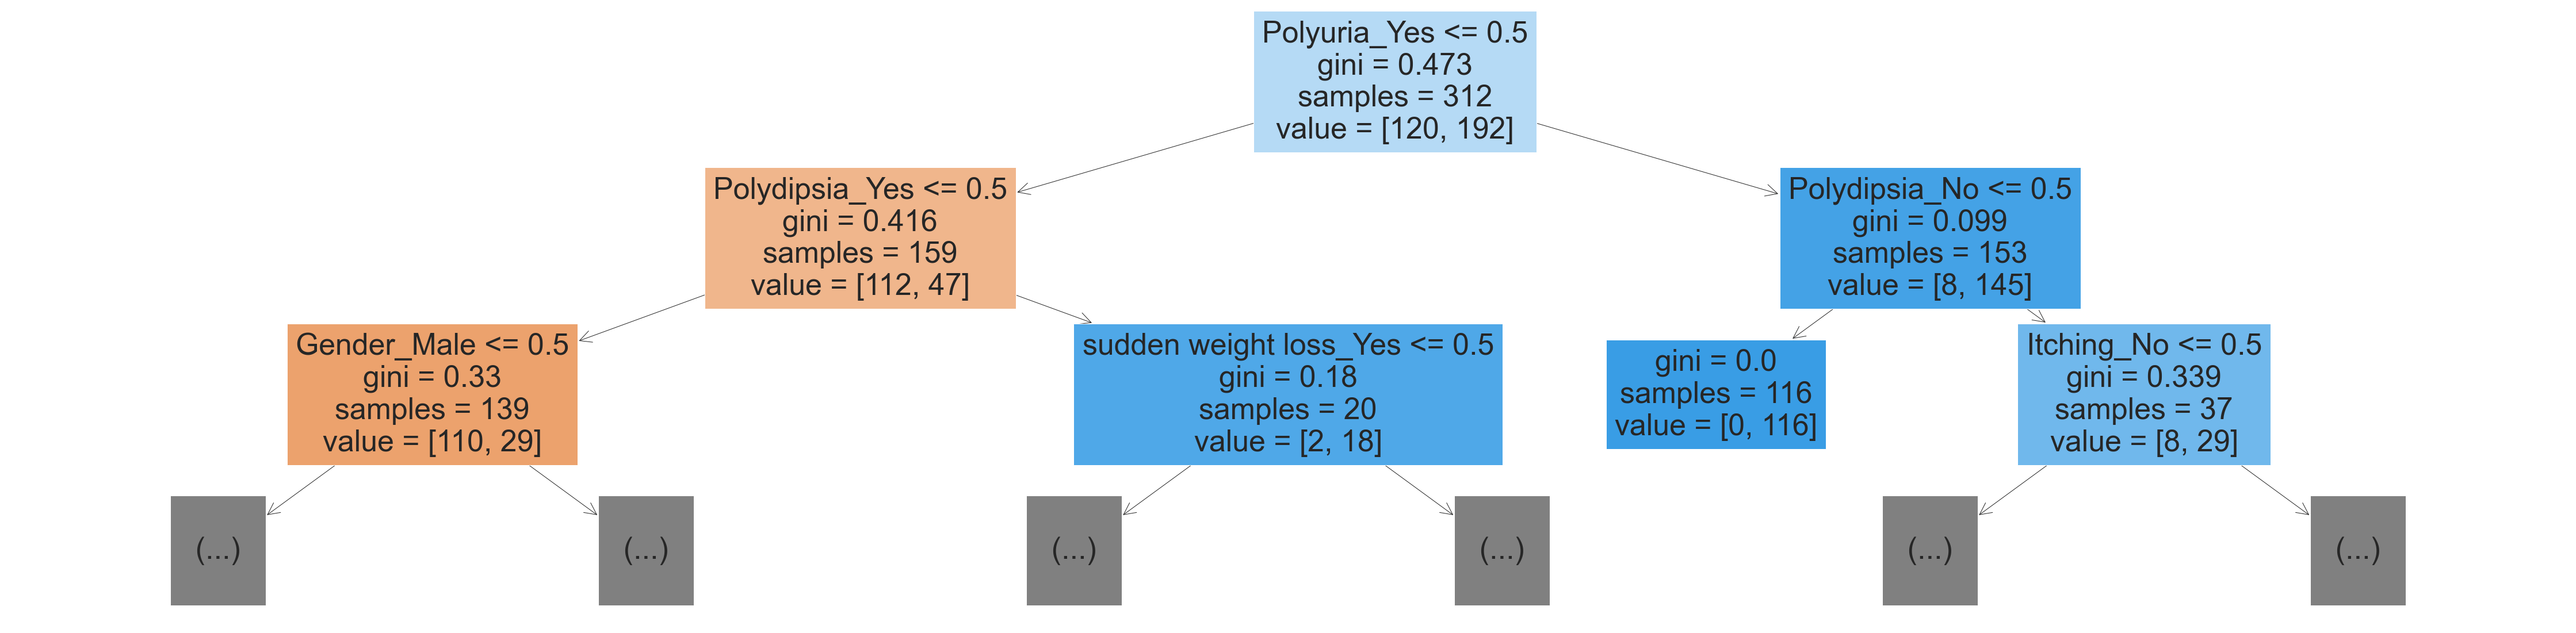

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth

10

We can also display the tree as text, which can be easier to follow for deeper trees.

In [ ]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Polyuria_Yes <= 0.50
|   |--- Polydipsia_Yes <= 0.50
|   |   |--- Gender_Male <= 0.50
|   |   |   |--- Alopecia_Yes <= 0.50
|   |   |   |   |--- Irritability_No <= 0.50
|   |   |   |   |   |--- class: Negative
|   |   |   |   |--- Irritability_No >  0.50
|   |   |   |   |   |--- visual blurring_Yes <= 0.50
|   |   |   |   |   |   |--- partial paresis_Yes <= 0.50
|   |   |   |   |   |   |   |--- sudden weight loss_No <= 0.50
|   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |   |--- sudden weight loss_No >  0.50
|   |   |   |   |   |   |   |   |--- Genital thrush_No <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |   |   |--- Genital thrush_No >  0.50
|   |   |   |   |   |   |   |   |   |--- Obesity_No <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |   |   |   |--- Obesity_No >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |-

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
model.feature_importances_

array([0.        , 0.0986291 , 0.        , 0.45642521, 0.01805229,
       0.11504089, 0.00286033, 0.02477764, 0.00688268, 0.        ,
       0.00412961, 0.        , 0.03408564, 0.00688268, 0.01179887,
       0.00493757, 0.02438768, 0.        , 0.02587151, 0.0091769 ,
       0.        , 0.01384959, 0.01468304, 0.01509226, 0.        ,
       0.02700631, 0.00734152, 0.06917397, 0.00183538, 0.00707932])

Let's turn this into a dataframe and visualize the most important features.

In [ ]:

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
3,Polyuria_Yes,0.456425
5,Polydipsia_Yes,0.115041
1,Gender_Male,0.098629
27,Alopecia_Yes,0.069174
12,Genital thrush_No,0.034086
25,muscle stiffness_Yes,0.027006
18,Irritability_No,0.025872
7,sudden weight loss_Yes,0.024778
16,Itching_No,0.024388
4,Polydipsia_No,0.018052


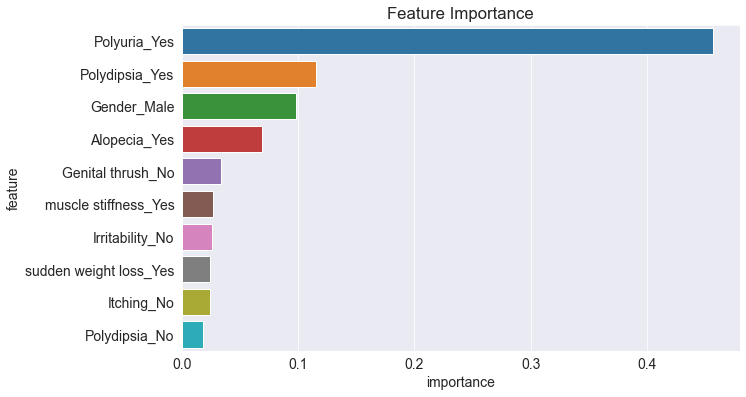

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Let's save our work before continuing.

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [ ]:
?DecisionTreeClassifier

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [ ]:
model.score(X_train, train_targets)

0.8974358974358975

In [ ]:
model.score(X_val, val_targets)

0.8942307692307693

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [ ]:
model.classes_

array(['Negative', 'Positive'], dtype=object)

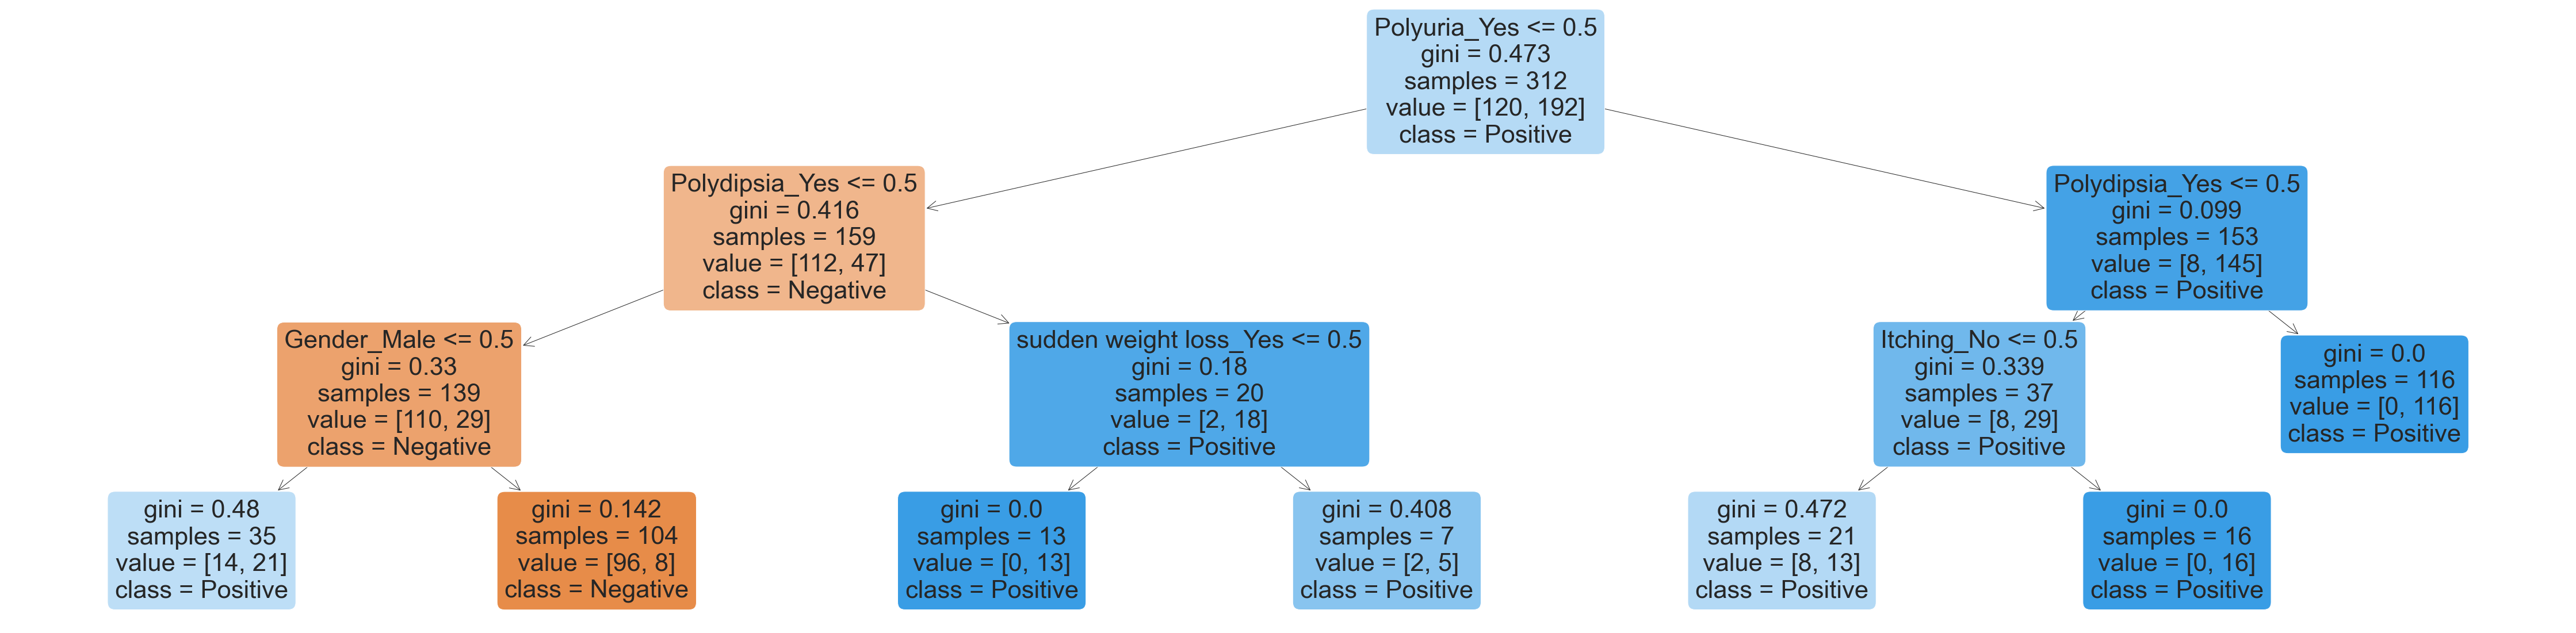

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

> **EXERCISE**: Study the decision tree diagram carefully and understand what each of the terms `gini`, `samples`, `value` and `class` mean.

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Polyuria_Yes <= 0.50
|   |--- Polydipsia_Yes <= 0.50
|   |   |--- Gender_Male <= 0.50
|   |   |   |--- class: Positive
|   |   |--- Gender_Male >  0.50
|   |   |   |--- class: Negative
|   |--- Polydipsia_Yes >  0.50
|   |   |--- sudden weight loss_Yes <= 0.50
|   |   |   |--- class: Positive
|   |   |--- sudden weight loss_Yes >  0.50
|   |   |   |--- class: Positive
|--- Polyuria_Yes >  0.50
|   |--- Polydipsia_Yes <= 0.50
|   |   |--- Itching_No <= 0.50
|   |   |   |--- class: Positive
|   |   |--- Itching_No >  0.50
|   |   |   |--- class: Positive
|   |--- Polydipsia_Yes >  0.50
|   |   |--- class: Positive



Let's experiment with different depths using a helper function.

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 114 ms


In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.176282,0.163462
1,2,0.125000,0.144231
2,3,0.102564,0.105769
3,4,0.054487,0.105769
4,5,0.035256,0.096154
5,6,0.025641,0.076923
6,7,0.016026,0.067308
7,8,0.006410,0.067308
8,9,0.006410,0.067308
9,10,0.006410,0.067308


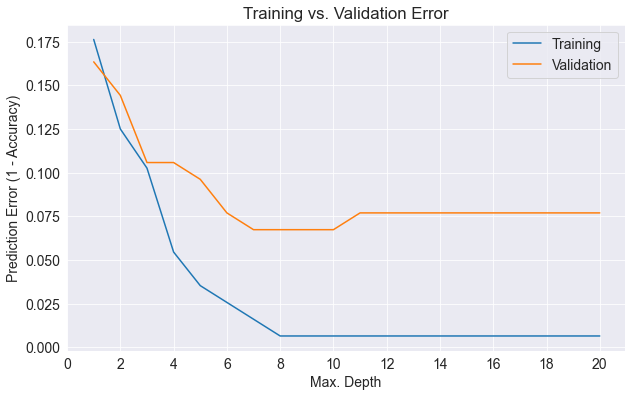

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">





You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.9326923076923077

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.9935897435897436

In [ ]:
model.score(X_val, val_targets)

0.9326923076923077

In [ ]:
model.tree_.max_depth

10

Notice that the model was able to achieve a greater depth of 12 for certain paths while keeping other paths shorter.

In [ ]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Polyuria_Yes <= 0.50
|   |--- Polydipsia_Yes <= 0.50
|   |   |--- Gender_Male <= 0.50
|   |   |   |--- Alopecia_Yes <= 0.50
|   |   |   |   |--- Irritability_Yes <= 0.50
|   |   |   |   |   |--- visual blurring_Yes <= 0.50
|   |   |   |   |   |   |--- partial paresis_Yes <= 0.50
|   |   |   |   |   |   |   |--- weakness_No <= 0.50
|   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |   |--- weakness_No >  0.50
|   |   |   |   |   |   |   |   |--- Genital thrush_Yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- Obesity_Yes <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |   |   |   |--- Obesity_Yes >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |   |   |--- Genital thrush_Yes >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Positive
|   |   |   |   |   |   |--- partial paresis_Yes >  0.50
|   |   |   |   |   |   |   |--- class: Negative
|   |   |   |   |   |

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [ ]:
%%time
model.fit(X_train, train_targets)

In [ ]:
model.score(X_train, train_targets)

In [ ]:
model.score(X_val, val_targets)

Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="640">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

We can can access individual decision trees using `model.estimators_`

In [ ]:
model.estimators_[0]

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=5, feature_names=X_train.columns, filled=True, rounded=False,class_names=model.classes_);

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=4, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
len(model.estimators_)

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a single decision tree.

Let's save our work before continuing.

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 



In [ ]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [ ]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [ ]:
base_accs = base_train_acc, base_val_acc
base_accs

We can use this as a benchmark for hyperparmeter tuning.

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [ ]:
model.fit(X_train, train_targets)

In [ ]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

In [ ]:
base_accs

model()

**500 estimators**

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
y=model.fit(X_train, train_targets)

In [ ]:
model.score(X_train, train_targets)

In [ ]:
model.score(X_val, val_targets)

In [ ]:
base_accs

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of `max_depth` and `max_leaf_nodes`.

In [ ]:
test_params(max_depth=5)

In [ ]:
test_params(max_depth=26)

In [ ]:
test_params(max_leaf_nodes=2**5)

In [ ]:
test_params(max_leaf_nodes=2**20)

In [ ]:
base_accs # no max depth or max leaf nodes

The optimal values of `max_depth` and `max_leaf_nodes` lies somewhere between 0 and unbounded.

In [ ]:
test_params(max_features='log2')

In [ ]:
test_params(max_features=3)

In [ ]:
test_params(max_features=6)

In [ ]:
base_accs

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [ ]:
test_params(min_samples_split=3, min_samples_leaf=2)

In [ ]:
test_params(min_samples_split=100, min_samples_leaf=60)

In [ ]:
base_accs

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
cf_matric=plot_confusion_matrix(model,val_targets,normalize=True)  
plt.show(cf_matric)


In [ ]:
import seaborn as sns
sns.heatmap(cf_matric, annot=True)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [ ]:
test_params(min_impurity_decrease=1e-7)

In [ ]:
test_params(min_impurity_decrease=1e-2)

In [ ]:
base_accs

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
confusion = metrics.confusion_matrix(val_targets,y_pred)
confusion

In [ ]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(confusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [ ]:
print(classification_report(val_targets,y_pred))

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [ ]:
test_params(bootstrap=False)

In [ ]:
base_accs

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [ ]:
test_params(max_samples=0.9)

In [ ]:
base_accs

### `class_weight`

In [ ]:
model.classes_

In [ ]:
test_params(class_weight='balanced')

In [ ]:
test_params(class_weight={'No': 1, 'Yes': 2})

In [ ]:
base_accs

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
nbModel = GaussianNB()

In [ ]:
nbModel.fit(X_train, train_targets)

In [ ]:
nb_y_pred = nbModel.predict(X_val)

In [ ]:
nbConfusion = metrics.confusion_matrix(val_targets, nb_y_pred)
nbConfusion

In [ ]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [ ]:
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_val,val_targets) * 100,'%')

In [ ]:
print(classification_report(val_targets, nb_y_pred))

In [ ]:
nb_TP = nbConfusion[1, 1]
nb_TN = nbConfusion[0, 0]
nb_FP = nbConfusion[0, 1]
nb_FN = nbConfusion[1, 0]

In [ ]:
nb_Precision = nb_TP / ( nb_TP + nb_FP)
print ('Precision: ', nb_Precision)

In [ ]:
nb_Recall = nb_TP / ( nb_TP + nb_FN )
print ('Recall: ', nb_Recall)

In [ ]:
nb_Specificity = nb_TN / ( nb_TN + nb_FP )
print ('Specificity: ', nb_Specificity)

In [ ]:
metrics.f1_score(val_targets, nb_y_pred)

In [ ]:
nb_Roc_Auc = metrics.roc_auc_score(y_test,nb_y_pred)
print ('Roc Auc Score: ', nb_Roc_Auc)

In [ ]:
nb_y_pred_prob = nbModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_y_pred_prob)

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
plt.plot(fpr, tpr)
plt.title('ROC Curve for Naive Bayes Diabetes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

In [ ]:
nb_Roc_Auc = metrics.roc_auc_score(val_targets,nb_y_pred)
print ('Roc Auc Score: ', nb_Roc_Auc)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [ ]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [ ]:
model.fit(X_train, train_targets)

In [ ]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

In [ ]:
base_accs

In [ ]:
raw_df

Finally, let's also compute the accuracy of our model on the test set.

In [ ]:
model.score(X_test, test_targets)

Notice that the test accuracy is lower